In [2]:
# initial environment
import pandas as pd
import numpy as np
import numpy.random as nr

nr.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv("datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

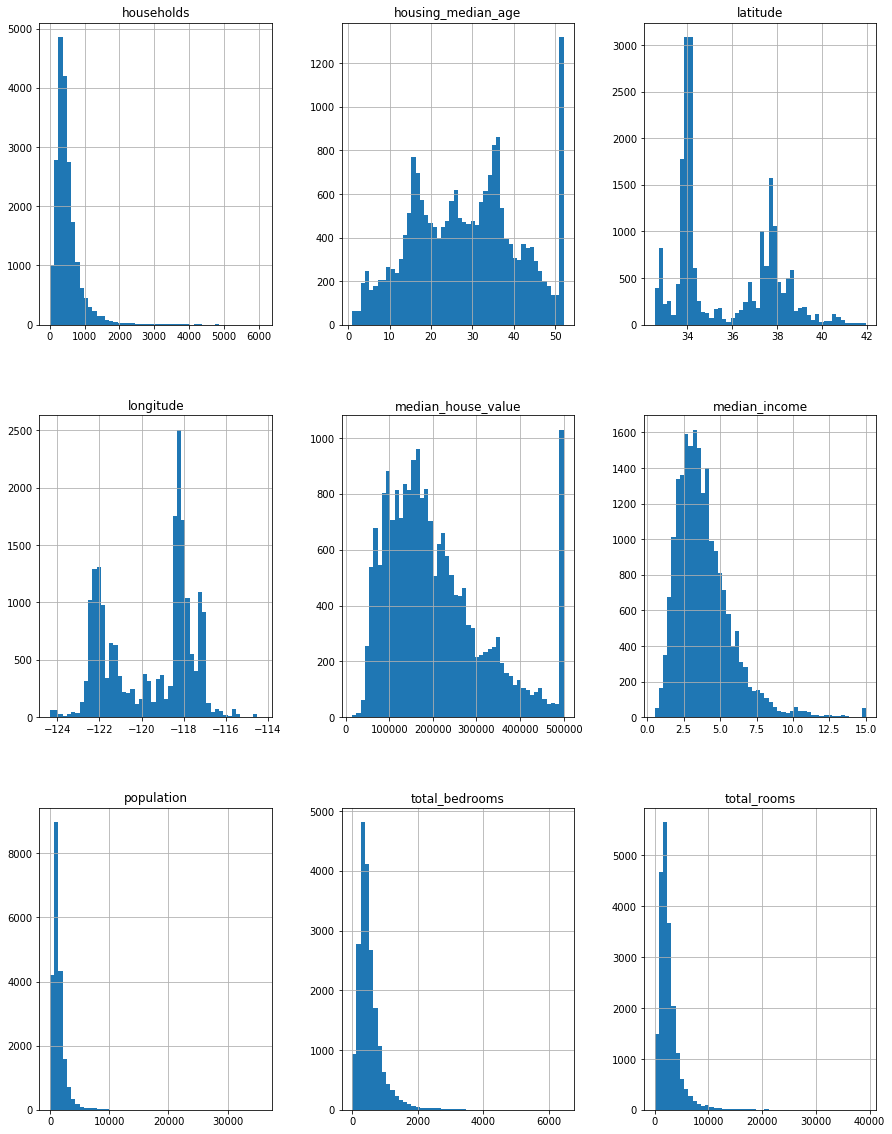

In [21]:
housing.hist(bins=50, figsize=(15, 20))
plt.show()

### different cluster

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### stratified sampling

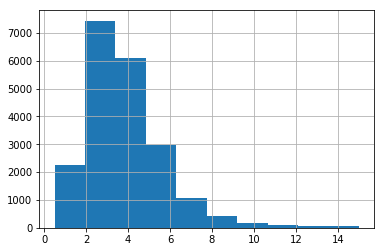

In [27]:
housing['median_income'].hist()
plt.show()

In [29]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [49]:
housing['income_cal'] = np.ceil(housing['median_income'] / 1.2)
housing['income_cal'].where(housing['income_cal'] < 5, 5.0, inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cal']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]
    
for item_set in (train_set, test_set):
    item_set.drop(['income_cal'], axis=1, inplace=True)

In [51]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15886 to 285
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16341 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [52]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 14821 to 15200
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4092 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


### Visualize and plot data

In [115]:
housing = train_set.copy()

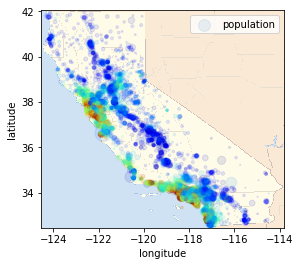

In [116]:
import matplotlib.image as mpimg
california_img=mpimg.imread('./images/end_to_end_project/california.png')
housing.plot(kind='scatter', x="longitude", y='latitude', alpha=0.1,
            s=housing['population']/100, label='population', 
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=False)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

#### Looking for Correlations

In [64]:
corr_matrix = housing.corr()

In [65]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687039
total_rooms           0.132190
housing_median_age    0.097673
households            0.063274
total_bedrooms        0.047032
population           -0.029804
longitude            -0.042475
latitude             -0.146746
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e53b650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ce1e4d0>]], dtype=object)

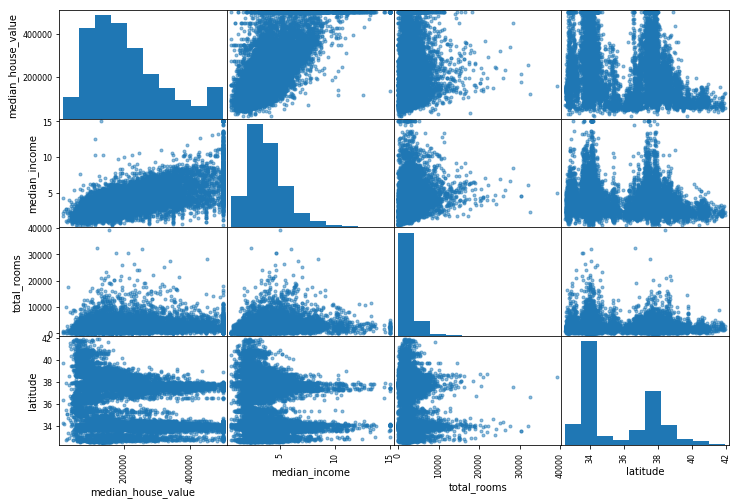

In [67]:
from pandas.tools.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 
              'latitude']
scatter_matrix(housing[attributes], figsize=(12, 8))

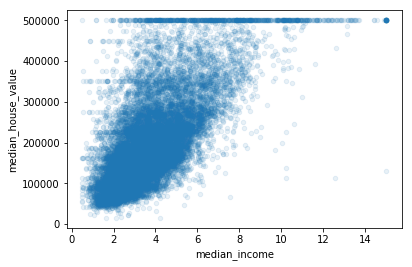

In [68]:
housing.plot(kind='scatter', x='median_income',
            y='median_house_value', alpha=0.1)

#### Summon
1. clean up some quirk such as  a horizontal line at $500,000 and so on
2. tail-heavy distribution, transform them

#### try attribute combinations

In [71]:
housing['rooms_per_household'] = housing['total_rooms'] /housing['households']
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687039
rooms_per_household    0.148766
total_rooms            0.132190
housing_median_age     0.097673
households             0.063274
total_bedrooms         0.047032
population            -0.029804
longitude             -0.042475
latitude              -0.146746
Name: median_house_value, dtype: float64

#### Prepare for data

In [208]:
housing = train_set.drop('median_house_value', axis=1)
housing_label = train_set['median_house_value'].copy()

housing_test = test_set.drop('median_house_value', axis=1)
housing_test_label = test_set['median_house_value'].copy()

#### Data cleaning 

In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15886 to 285
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16341 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [87]:
housing.dropna(subset=['total_bedrooms']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16341 entries, 15886 to 285
Data columns (total 9 columns):
longitude             16341 non-null float64
latitude              16341 non-null float64
housing_median_age    16341 non-null float64
total_rooms           16341 non-null float64
total_bedrooms        16341 non-null float64
population            16341 non-null float64
households            16341 non-null float64
median_income         16341 non-null float64
ocean_proximity       16341 non-null object
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [86]:
housing.drop('total_bedrooms', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15886 to 285
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [101]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)

In [104]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [209]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [106]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [108]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

#### scikit_learn
- estimator:`fit`,`transform`,`predict`,`score`
- hyperparameters: `imputer.strategy`
- learned parameters: `imputer.statistics_`
- pipeline
- provide reasonable default values

#### Handling Text and Categorical Attributes 

In [110]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [111]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

#### Custom Transformers
1. BaseEstimator [`get_params()` and `set_params()`]
2. TransformerMixin [`fit_transform`]

In [158]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selector):
        self._selector = selector
        return
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self._selector].values

#### Feature Scaling
1. min-max scaling[normalization] `MinMaxScaler`
2. standardization[`StandardScaler`]

Standardization is much less affected by outliers.

#### PipeLine

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler


num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

num_pipeline = Pipeline([
         ('selector', DataFrameSelector(num_attributes)),
         ('imputer', Imputer(strategy='median')),
         ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attributes)),
        ('label_binarizer', LabelBinarizer())
    ])
full_pipeline = FeatureUnion(transformer_list=[
         ("num_pipeline", num_pipeline),
         ("cat_pipeline", cat_pipeline),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

#### Select and Train a Model

In [214]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(housing_prepared, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [215]:
test_data_prepared = full_pipeline.transform(housing_test)
lin_result = linear_reg.predict(test_data_prepared)

In [216]:
from sklearn.metrics import mean_squared_error
lin_mse = np.sqrt(mean_squared_error(lin_result, housing_test_label))
print(lin_mse)

69606.1158958


In [217]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [218]:
tree_result = tree_reg.predict(test_data_prepared)
tree_mse = np.sqrt(mean_squared_error(tree_result, housing_test_label))
print tree_mse

66694.4303755


#### CV

In [219]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, 
                        housing_label,
                        scoring='neg_mean_squared_error',
                        cv=10)
rmse_scores=np.sqrt(-scores)

In [220]:
print rmse_scores

[ 67877.3336792   63258.742304    65786.91896846  66091.54338954
  67403.38571419  68878.14561317  70792.20588352  73720.17992443
  68991.30395637  68400.97276898]


In [222]:
print housing_prepared.shape

(16512, 13)


In [223]:
print housing_label.shape

(16512,)


In [224]:
print test_data_prepared.shape

(4128, 13)


In [229]:
print forest_result.shape, forest_result.shape

(4128,) (4128,)


In [234]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)
forest_result = forest_reg.predict(test_data_prepared)
foreset_mse = np.sqrt(mean_squared_error(forest_result, housing_test_label))
print(foreset_mse)

50389.6042843


#### Save your data
joblib

In [231]:
from sklearn.externals import joblib
joblib.dump(forest_reg, 'forest.pkl')
new_forest_loaded = joblib.load('forest.pkl')

In [ ]:
forest_result = forest_reg.predict(test_data_prepared)
foreset_mse = np.sqrt(mean_squared_error(forest_result, housing_test_label))
print(foreset_mse)

### Fine-Tune your model

#### 1. Grid Search 

In [235]:
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [236]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [239]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print np.sqrt(-mean_score), params

64353.5400479 {'max_features': 2, 'n_estimators': 3}
55061.62244 {'max_features': 2, 'n_estimators': 10}
52422.215807 {'max_features': 2, 'n_estimators': 30}
61067.0524768 {'max_features': 4, 'n_estimators': 3}
52675.9004604 {'max_features': 4, 'n_estimators': 10}
50353.0394556 {'max_features': 4, 'n_estimators': 30}
57644.93197 {'max_features': 6, 'n_estimators': 3}
51911.4368811 {'max_features': 6, 'n_estimators': 10}
50055.258774 {'max_features': 6, 'n_estimators': 30}
58307.0236108 {'max_features': 8, 'n_estimators': 3}
52014.7442936 {'max_features': 8, 'n_estimators': 10}
49645.9568657 {'max_features': 8, 'n_estimators': 30}
62835.6387409 {'max_features': 2, 'n_estimators': 3, 'bootstrap': False}
54016.3847398 {'max_features': 2, 'n_estimators': 10, 'bootstrap': False}
60309.2905835 {'max_features': 3, 'n_estimators': 3, 'bootstrap': False}
52782.2528773 {'max_features': 3, 'n_estimators': 10, 'bootstrap': False}
58384.151583 {'max_features': 4, 'n_estimators': 3, 'bootstrap': Fal

#### 2. Randomized Search
Use Random first, explore 1,000 different values for each hyperparameter. Then try to find the best parameter

In [250]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
foreset_reg = RandomForestRegressor()
params_distribution = {
    "bootstrap": [True, False],
    'n_estimators': sp_randint(1, 100), 
    'max_features': sp_randint(1, 13),
}
rand_search = RandomizedSearchCV(forest_reg, params_distribution, cv=5, 
                          scoring='neg_mean_squared_error')
rand_search.fit(housing_prepared, housing_label)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1149b3750>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11415a350>, 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [251]:
rand_search.best_params_

{'bootstrap': False, 'max_features': 7, 'n_estimators': 91}

In [252]:
final_model = rand_search.best_estimator_
final_predictions = final_model.predict(test_data_prepared)
final_mse = mean_squared_error(housing_test_label, final_predictions)
print np.sqrt(final_mse)

47431.7981226


#### 3. Ensemble Methods

#### 4. Analyze the best model and their error
drop some of the less useful features
specific errors that your system makes(adding extra features, or getting rid of some, outlier)

In [240]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [241]:
feature_importances

array([  1.15982972e-01,   1.05769025e-01,   4.92508678e-02,
         2.98132379e-02,   2.61755318e-02,   3.82380005e-02,
         2.53638813e-02,   4.40879438e-01,   8.56265362e-03,
         1.52070387e-01,   2.01371577e-04,   1.80706136e-03,
         5.88557289e-03])

In [243]:
one_hot_attributes = list(encoder.classes_)
attributes = num_attributes + one_hot_attributes
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4408794383827615, 'median_income'),
 (0.15207038654172186, 'INLAND'),
 (0.11598297157848814, 'longitude'),
 (0.10576902479037657, 'latitude'),
 (0.049250867774352988, 'housing_median_age'),
 (0.038238000496867194, 'population'),
 (0.029813237863655421, 'total_rooms'),
 (0.026175531810749463, 'total_bedrooms'),
 (0.02536388131688978, 'households'),
 (0.0085626536157905504, '<1H OCEAN'),
 (0.0058855728944055231, 'NEAR OCEAN'),
 (0.0018070613569655812, 'NEAR BAY'),
 (0.00020137157697550393, 'ISLAND')]

#### Evaluate your system on the test set

In [244]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_data_prepared)
final_mse = mean_squared_error(housing_test_label, final_predictions)
print np.sqrt(final_mse)

48084.1341575


#### Lauch, Monitor and Maintain your system
1. Monitor code to check your system's live performance at regular intervals and trigger alerts when it drops.
2. Sampling the system's predictions and evaluating them
3. Evaluate the system's input data quality
4. train your model on a regular basis using fresh data
5. save snapshots of its state at regular intervals so you can roll back to a previously working state